# Appendix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
crop=pd.read_csv("Crop_recommendation.csv")
crop

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.drop_duplicates()

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [6]:
crop.describe()


N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [7]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
crop.shape

(2200, 8)

In [9]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
crop['label'].nunique()

22

In [11]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

EDA

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

<AxesSubplot:xlabel='ph', ylabel='Density'>

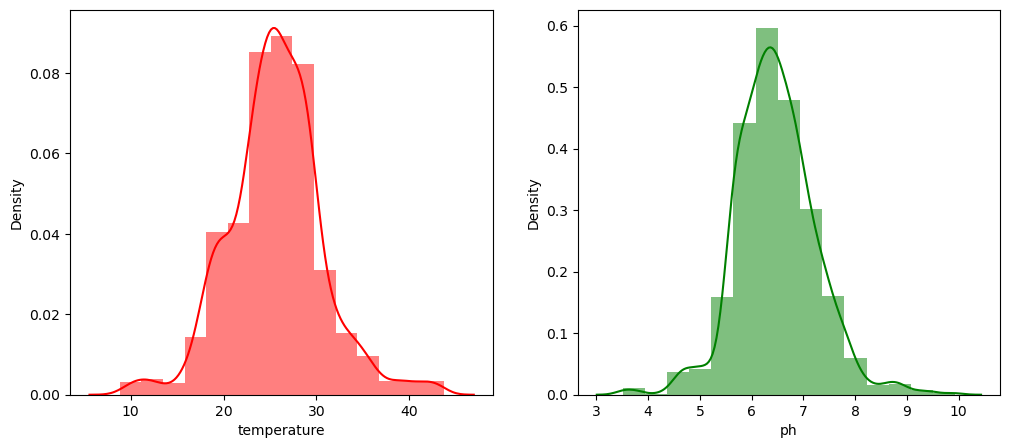

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(crop['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['ph'],color="green",bins=15,hist_kws={'alpha':0.5})

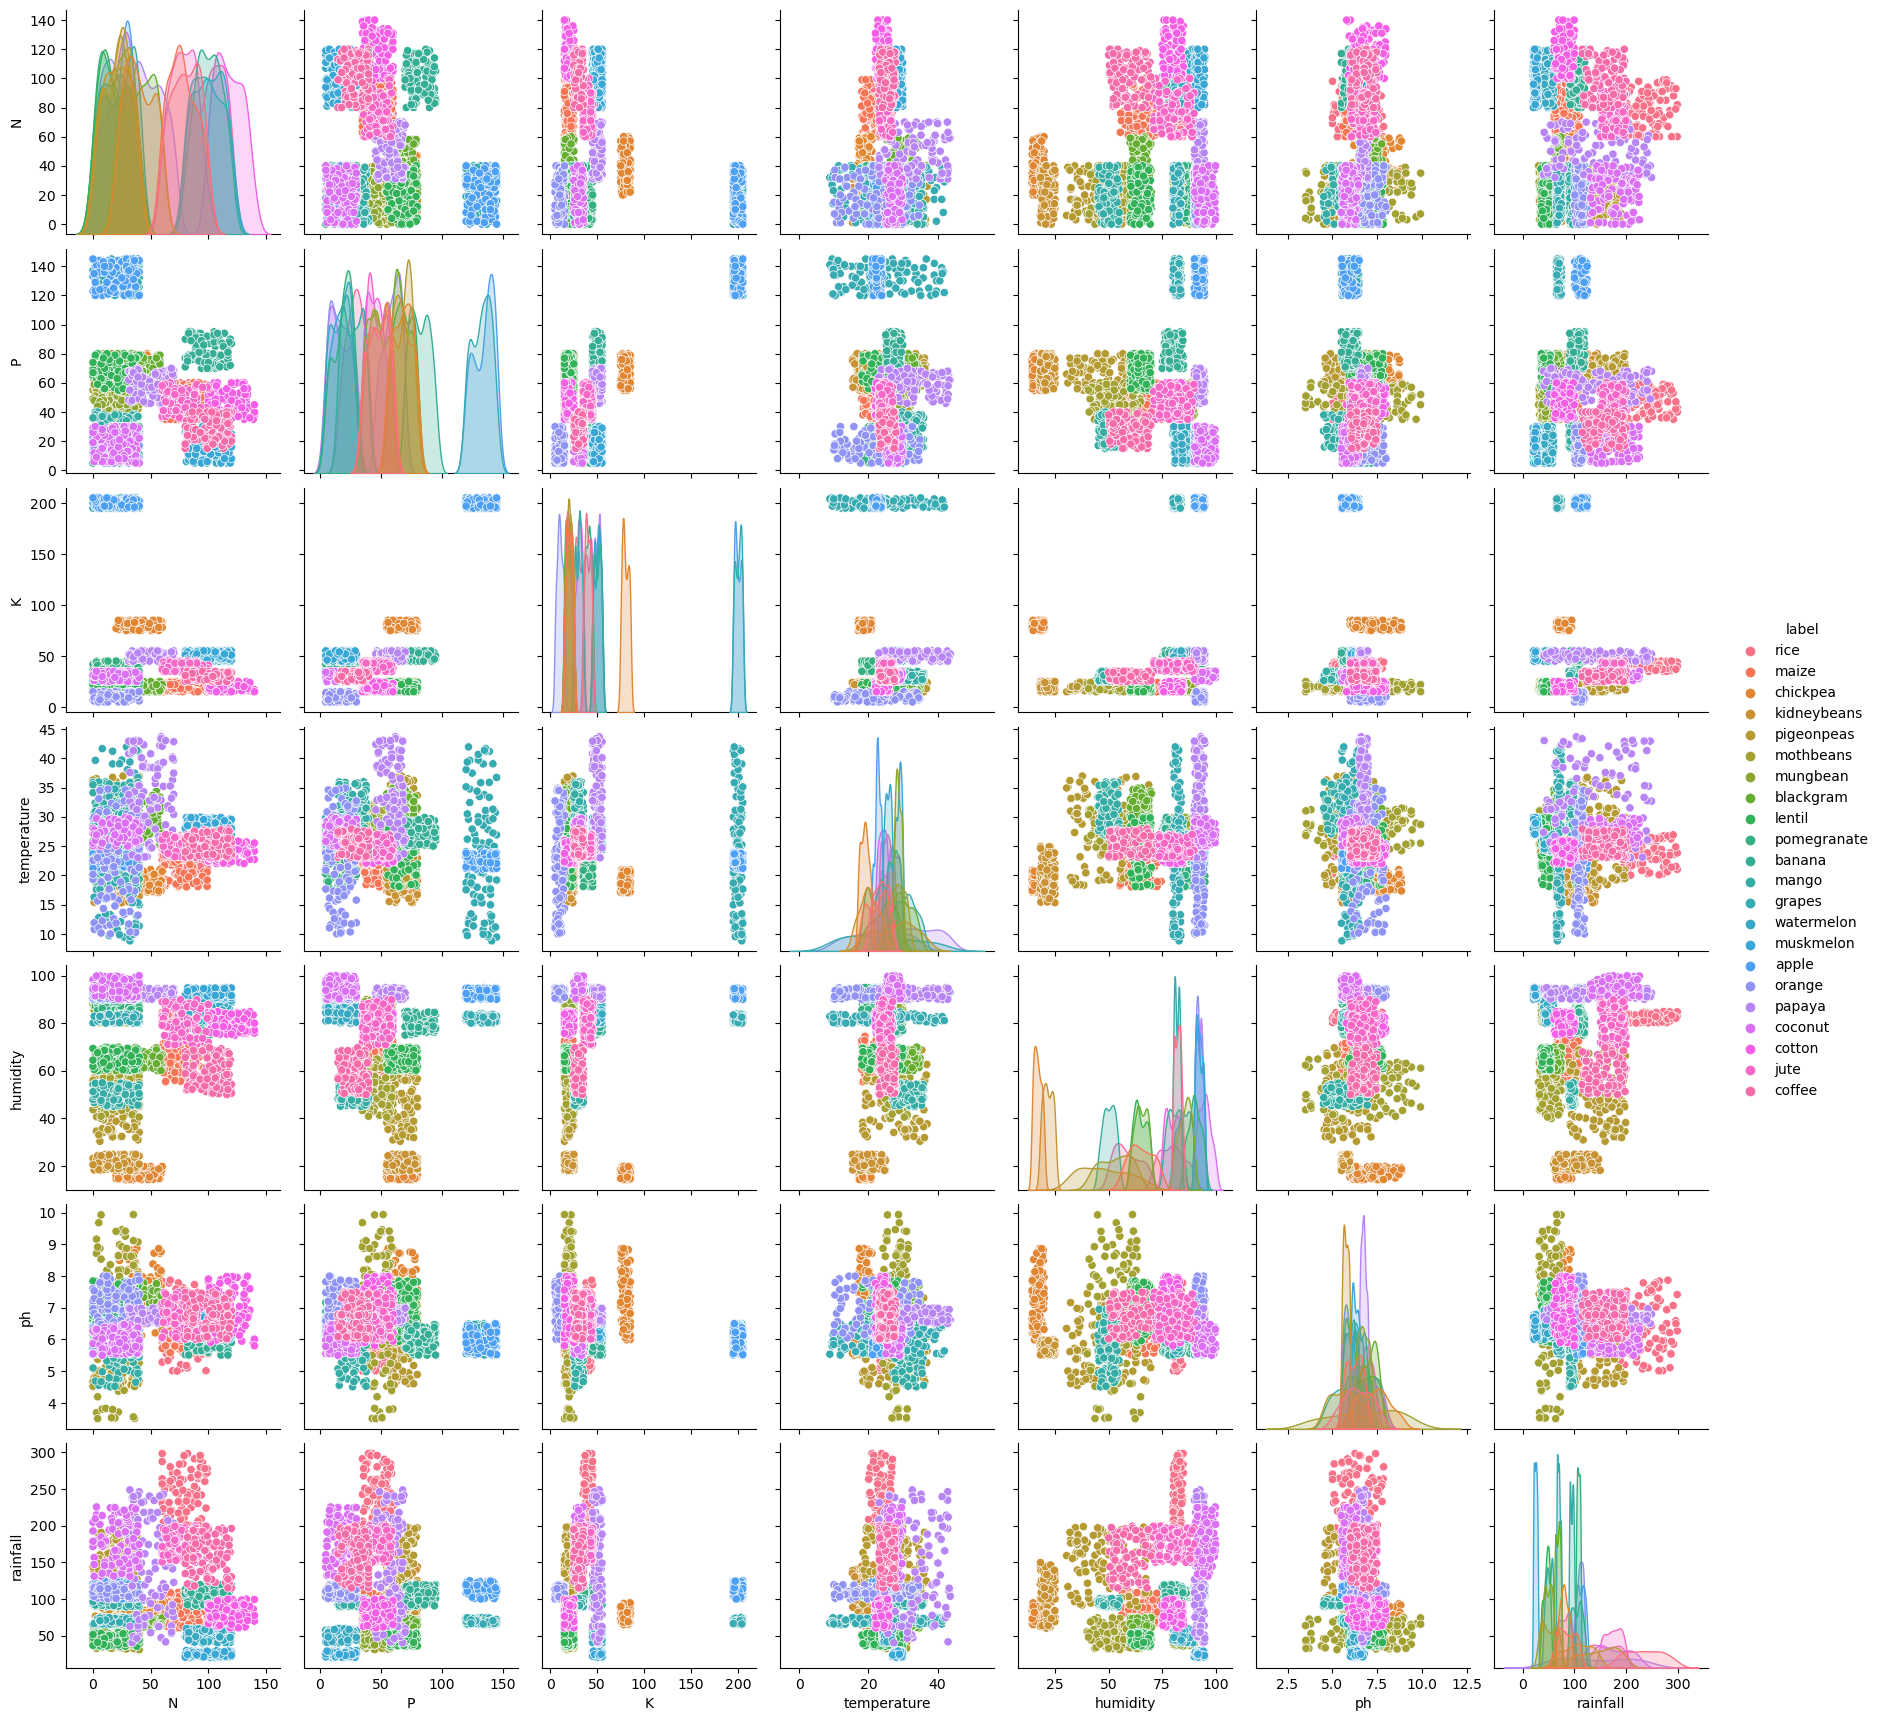

In [14]:
sns.pairplot(crop,hue = 'label')

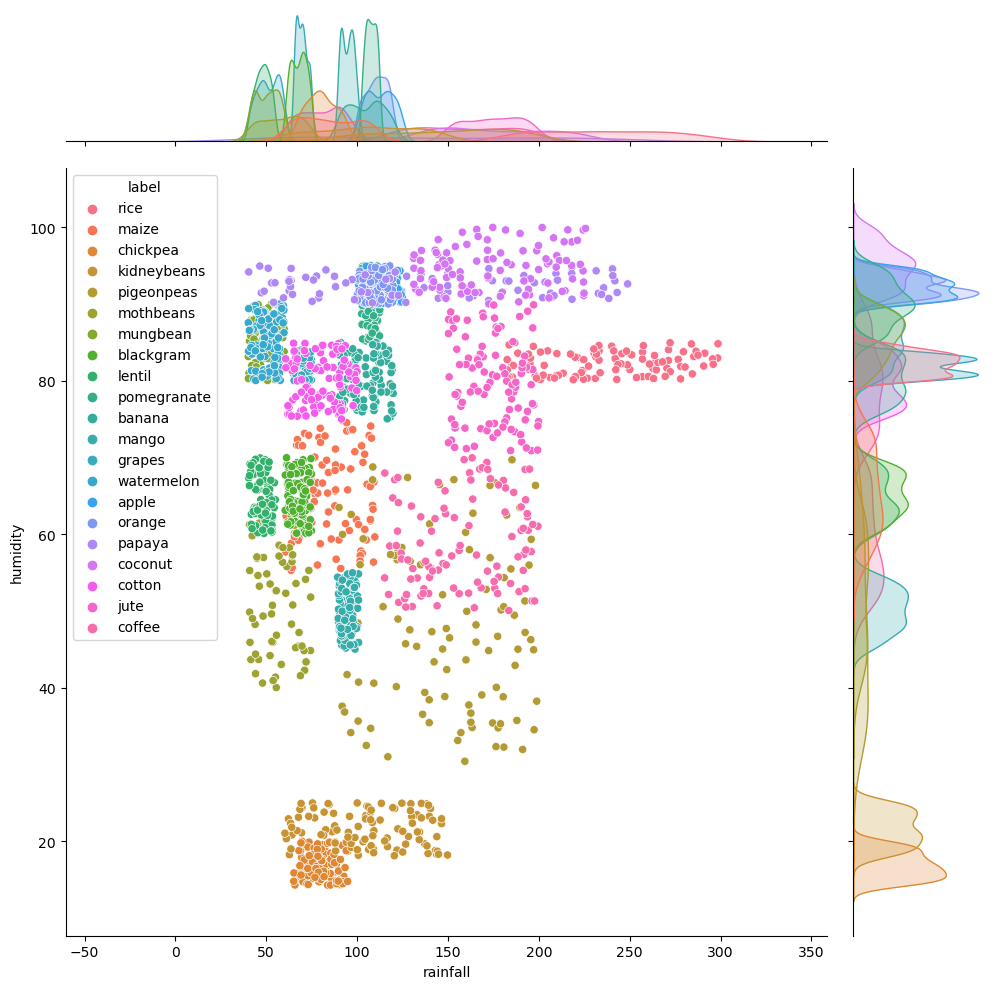

In [15]:
sns.jointplot(x="rainfall",y="humidity",data=crop[(crop['temperature']<40) & 
                                                  (crop['rainfall']>40)],height=10,hue="label")

<AxesSubplot:xlabel='label', ylabel='ph'>

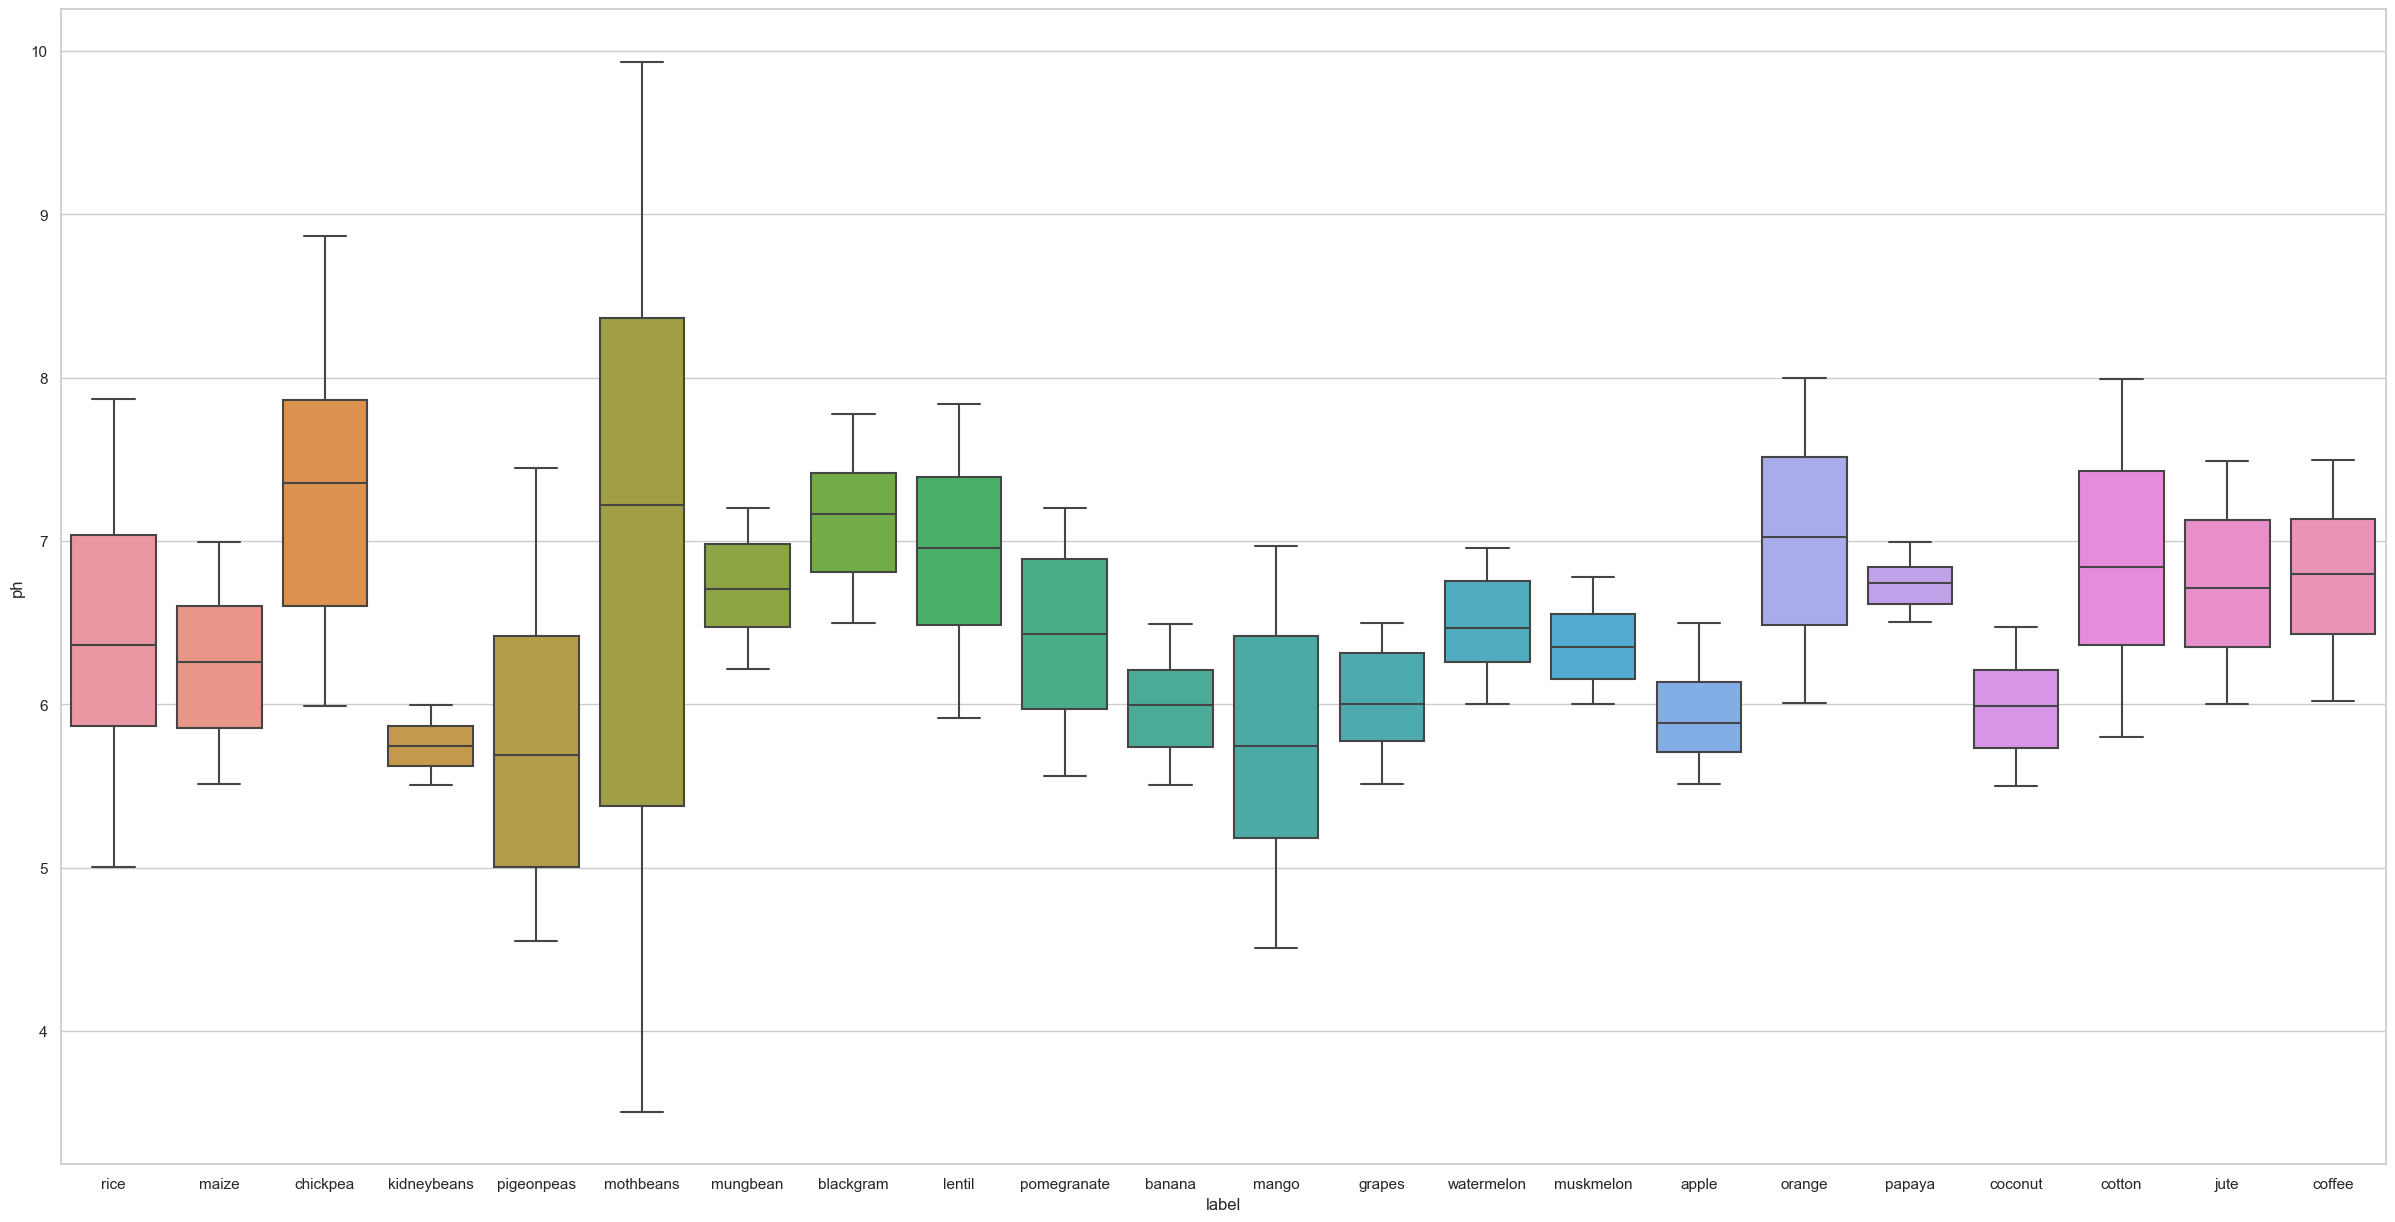

In [16]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=crop)

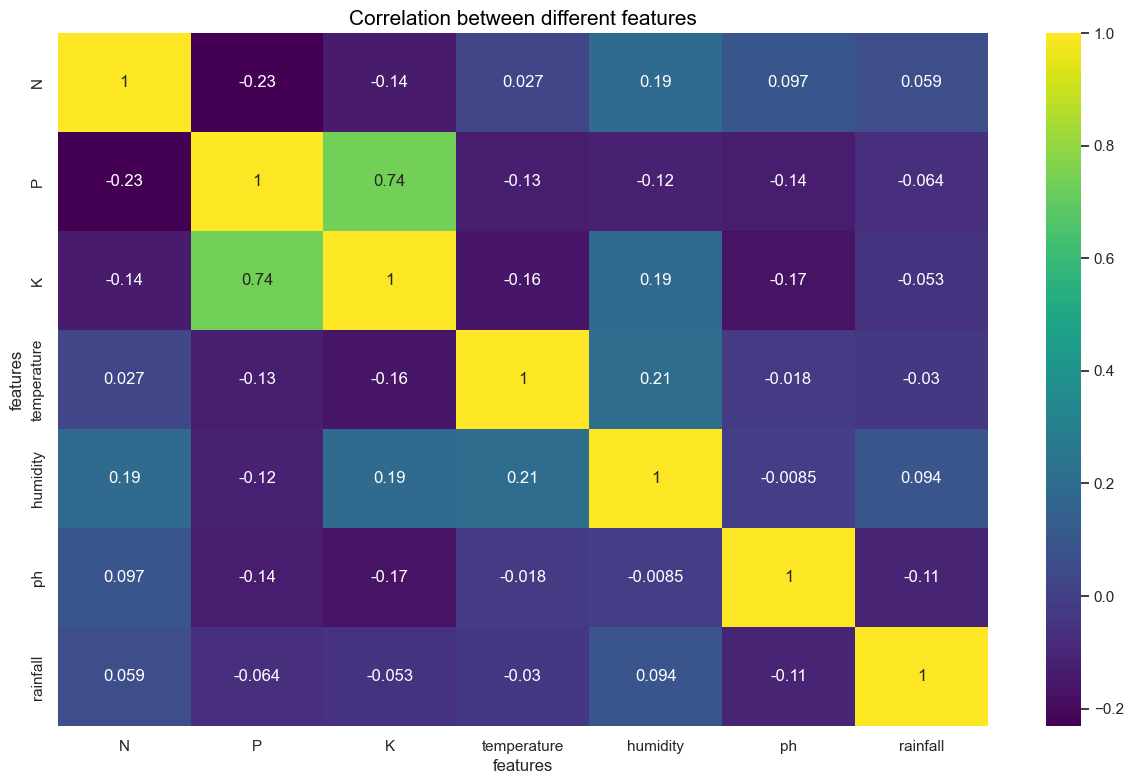

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [18]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

# k,P of apple & grapes is way more than other plants
#  rice crop need more water than all other plants
#  mango and papaya needs more temp to grow


In [19]:


fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

# Feature Selection

In [20]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']


In [21]:
acc = []
model = []

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# Modeling Classification algorithms

In [31]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predicted_values = LR.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("LR Accuracy is: ", x)

#### LR Accuracy is:  0.87

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

# print(classification_report(y_test,predicted_values))

#### KNN Accuracy is: 0.899

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x)

# print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  0.9


#### Decision Tree's Accuracy is:  0.9

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

# print(classification_report(y_test,predicted_values))

#### Random Forest Accuracy is:  0.935454

#### Random Forest Accuracy is:  0.935454

CrossVaildation

In [38]:
from sklearn.model_selection import GridSearchCV


def find_best_model_using_gridsearchcv(X,Y):
     algos = {
         'R_F_R': {
             'model': RandomForestClassifier(),
             'params': {
        
                 'criterion': ['entropy', 'log_loss'],
                 'n_estimators':[10,20,35],
             }
         },
         'decision_tree': {
             'model': DecisionTreeClassifier(),
             'params': {
                 'criterion' : ['entropy', 'log_loss'],
                 'splitter': ['best','random']
             }
         }
     }
     scores = []
     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
     for algo_name, config in algos.items():
         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
         gs.fit(X,Y)
         scores.append({
             'model': algo_name,
             'best_score': gs.best_score_,
             'best_params': gs.best_params_
         })

     return pd.DataFrame(scores,columns=['model','best_score','best_params'])
#find_best_model_using_gridsearchcv(features,target)

In [40]:
RF=RandomForestClassifier(criterion= 'entropy', n_estimators= 35)
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)


In [ ]:
RF.score(x_test,y_test)

##### 0.9409